### Benchmark model 

#### Benchmark with split

First we select the 10 top features

In [317]:
import pandas as pd
from helper_functions import *

In [316]:
importlib.reload(helper_functions)

<module 'helper_functions' from 'C:\\Source\\predicting-house-prices\\helper_functions.py'>

In [232]:
train_df = pd.read_csv('data/train.csv')

In [233]:
# This time we train on the complete set
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# We remove categorical features first
X = X.select_dtypes(exclude=['object'])

# Remove columns with null values
X = X.drop(X.columns[X.isnull().any(axis=0)], axis=1)

# Because of the skewed distribution we take the log of the sale price
y = np.log1p(y)

In [234]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=10)
sel.fit(X, y)

SelectKBest(k=10, score_func=<function f_classif at 0x0000025AEDCD0D90>)

In [235]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sel.scores_})

In [236]:
feature_scores.sort_values('Score', ascending=False).head(10)

,Feature,Score
3,OverallQual,5.729183
31,MiscVal,3.756250
14,GrLivArea,3.435110
2,LotArea,3.285852
23,GarageCars,2.861594
17,FullBath,2.678847
24,GarageArea,2.583341
11,1stFlrSF,2.338620
10,TotalBsmtSF,2.315290
5,YearBuilt,2.310198


In [237]:
top_columns = feature_scores.sort_values('Score', ascending=False).head(10)['Feature']

In [238]:
X[top_columns].head()

,OverallQual,MiscVal,GrLivArea,LotArea,GarageCars,FullBath,GarageArea,1stFlrSF,TotalBsmtSF,YearBuilt
0,7,0,1710,8450,2,2,548,856,856,2003
1,6,0,1262,9600,2,2,460,1262,1262,1976
2,7,0,1786,11250,2,2,608,920,920,2001
3,7,0,1717,9550,3,1,642,961,756,1915
4,8,0,2198,14260,3,2,836,1145,1145,2000


In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[top_columns], y, test_size=.3, random_state=42)

In [240]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [241]:
y_hat = reg.predict(X_test)

In [242]:
print_benchmark(y_test, y_hat)

R2-score: 0.834722700415
RMSE (log): 0.1674463871816331


#### And now train on the whole set provided

In [243]:
train_df = pd.read_csv('data/train.csv')
X = train_df.drop('SalePrice', axis=1)
y = np.log(train_df['SalePrice'])

In [244]:
reg = LinearRegression(normalize=True)
reg.fit(X[top_columns], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [245]:
y_hat = reg.predict(X[top_columns])

In [246]:
print_benchmark(y, y_hat)

R2-score: 0.818633945381
RMSE (log): 0.1700566727323582


### We predict on the test set

In [247]:
test_df = pd.read_csv('data/test.csv')
X = test_df[top_columns]

In [248]:
# How many null rows in each column
null_columns = X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64

In [249]:
# We impute garage are with
X.loc[X['GarageArea'].isnull(), 'GarageArea'] = 0
X.loc[X['GarageCars'].isnull(), 'GarageCars'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [250]:
X.loc[X['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = np.mean(X['TotalBsmtSF'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [251]:
# How many null rows in each column
null_columns = X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Series([], dtype: float64)

In [304]:
y_hat = reg.predict(X)

In [312]:
y_hat = np.expm1(y_hat)

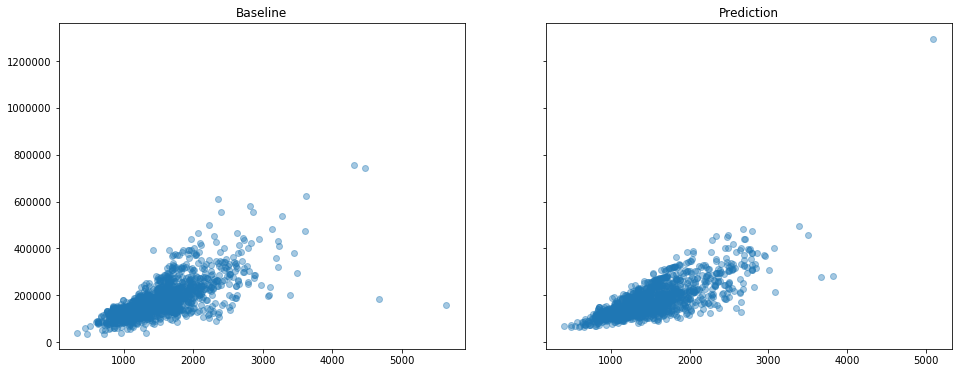

In [313]:
draw_sanity_check(y_hat)

In [318]:
write_submission(test_df, y_hat)

File written to C:\Source\predicting-house-prices\submissions\20180710215734.csv
